In [1]:
import pandas as pd
import numpy as np
import os
df=pd.read_csv('Walmart.csv')
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
print("\nSummary Statistics:")
print(df.describe(include='all'))
print("\nDuplicate Rows:", df.duplicated().sum())
print("\nNull Values:")
print(df.isnull().sum())


Summary Statistics:
              Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
count   6435.000000        6435  6.435000e+03   6435.000000  6435.000000   
unique          NaN         143           NaN           NaN          NaN   
top             NaN  05-02-2010           NaN           NaN          NaN   
freq            NaN          45           NaN           NaN          NaN   
mean      23.000000         NaN  1.046965e+06      0.069930    60.663782   
std       12.988182         NaN  5.643666e+05      0.255049    18.444933   
min        1.000000         NaN  2.099862e+05      0.000000    -2.060000   
25%       12.000000         NaN  5.533501e+05      0.000000    47.460000   
50%       23.000000         NaN  9.607460e+05      0.000000    62.670000   
75%       34.000000         NaN  1.420159e+06      0.000000    74.940000   
max       45.000000         NaN  3.818686e+06      1.000000   100.140000   

         Fuel_Price          CPI  Unemployment  
count   6435.0000

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Check data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None


In [5]:
#check total saler per store

store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
store_sales = store_sales.sort_values(by="Weekly_Sales", ascending=False)

print(store_sales.head())


    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08


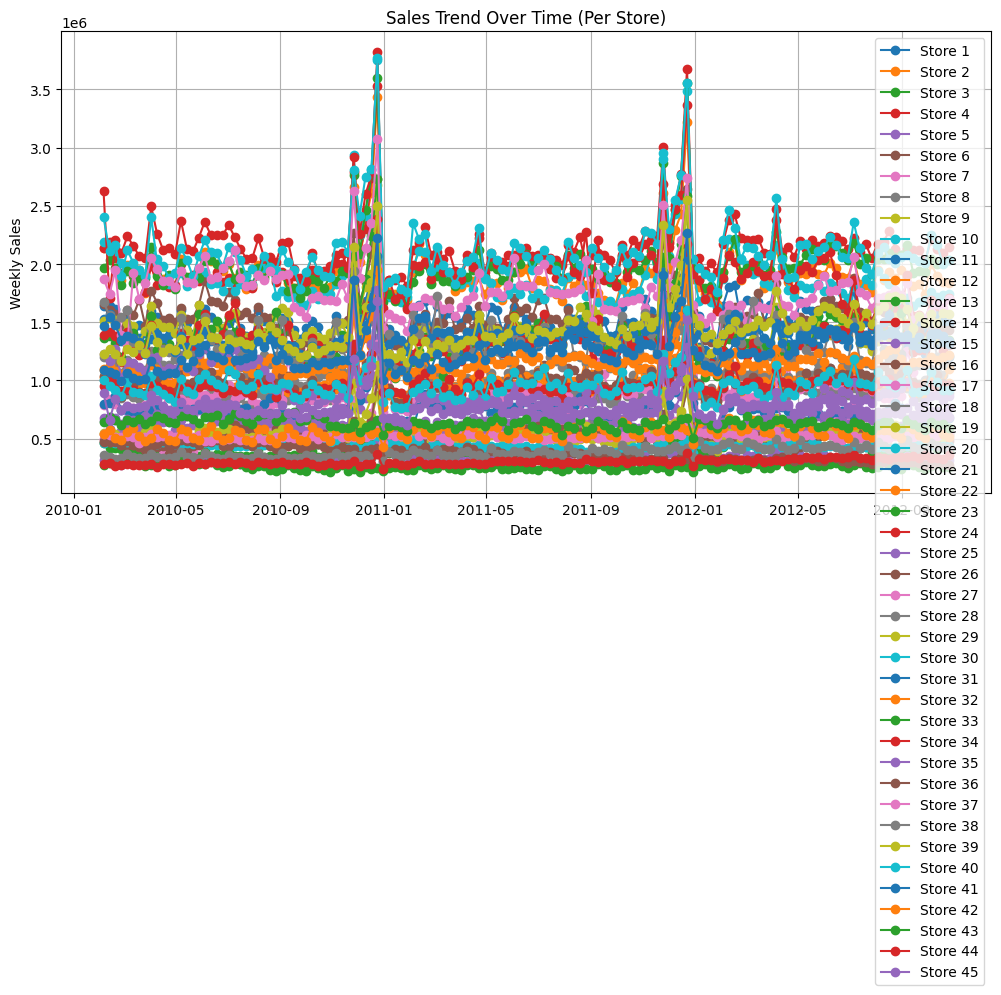

In [9]:
import matplotlib.pyplot as plt

# Aggregate sales by Date and Store
df_grouped = df.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()

# Plot sales trends for different stores
plt.figure(figsize=(12,6))

for store in df_grouped['Store'].unique():
    store_data = df_grouped[df_grouped['Store'] == store]
    plt.plot(store_data['Date'], store_data['Weekly_Sales'], marker='o', linestyle='-', label=f'Store {store}')

plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Sales Trend Over Time (Per Store)")
plt.legend()
plt.grid()
plt.show()


In [7]:
#holiday impact on sales
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
print(holiday_sales)


Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64


In [10]:
df_grouped.to_csv("cleaned_s_data.csv", index=False)